In [15]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from PIL import Image

from utils import *
from model import *

%reload_ext autoreload
%autoreload 2

In [45]:
# Helper functions
def load_image(infilename):
    data = mpimg.imread(infilename)
    return data


def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
    return rimg


# Concatenate an image and its groundtruth
def concatenate_images(img, gt_img):
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3), dtype=np.uint8)
        gt_img8 = img_float_to_uint8(gt_img)
        gt_img_3c[:, :, 0] = gt_img8
        gt_img_3c[:, :, 1] = gt_img8
        gt_img_3c[:, :, 2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = np.concatenate((img8, gt_img_3c), axis=1)
    return cimg

# def img_crop(im, w, h):
#     list_patches = []
#     imgwidth = im.shape[0]
#     imgheight = im.shape[1]
#     is_2d = len(im.shape) < 3
#     for i in range(0, imgheight, h):
#         for j in range(0, imgwidth, w):
#             if is_2d:
#                 im_patch = im[j : j + w, i : i + h]
#             else:
#                 im_patch = im[j : j + w, i : i + h, :]
#             list_patches.append(im_patch)
#     return list_patches

def label_to_img(imgwidth, imgheight, w, h, labels):
    im = np.zeros([imgwidth, imgheight])
    idx = 0
    for i in range(0, imgheight, h):
        for j in range(0, imgwidth, w):
            im[j : j + w, i : i + h] = labels[idx]
            idx = idx + 1
    return im


def img_overlay(img, prediction):
    w = img.shape[0]
    h = img.shape[1]

    predicted_img = label_to_img(w, h, IMG_PATCH_SIZE, IMG_PATCH_SIZE, prediction)

    color_mask = np.zeros((w, h, 3), dtype=np.uint8)
    color_mask[:, :, 0] = predicted_img * 255

    img8 = img_float_to_uint8(img)
    background = Image.fromarray(img8, "RGB").convert("RGBA")
    overlay = Image.fromarray(color_mask, "RGB").convert("RGBA")
    new_img = Image.blend(background, overlay, 0.2)
    return new_img

In [35]:
model = load_model("banana.keras")

In [ ]:
img = load_image("data/training/images/satImage_001.png")
patches = img_crop(img, IMG_PATCH_SIZE, IMG_PATCH_SIZE)

predictions = []
for patch in patches:
    print(patch.shape)
    predictions.append(model.predict(np.expand_dims(patch, axis=0))) # how can I remove np.expand_dims ?


(16, 16, 3)


I0000 00:00:1732796001.978204   91085 service.cc:146] XLA service 0x768e300054d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732796001.978235   91085 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2024-11-28 13:13:21.986842: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-28 13:13:22.016542: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


I0000 00:00:1732796002.629020   91085 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(16, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[array([[1.000000e+00, 8.145903e-15]], dtype=float32), array([[9.9999917e-01, 7.8140312e-07]], dtype=float32), array([[1.0000000e+00, 6.6155894e-19]], dtype=float32), array([[1.0000000e+00, 3.4608937e-24]], dtype=float32), array([[1., 0.]], dtype=float32), array([[1.0000e+00, 1.2498e-41]], dtype=float32), array([[1.000000e+00, 2.241964e-26]], dtype=float32), array([[1., 0.]], dtype=float32), array([[1.000000e+00, 9.138401e-09]], dtype=float32), array([[1.0000000e+00, 2.0404974e-08]], dtype=float32), array([[9.9998713e-01, 1.2827522e-05]], dtype=float32), array([[1.0000000e+00, 7.6038694e-20]], dtype=float32), array([[7.7876e-14, 1.0000e+00]], dtype=float32), array([[0.15028802, 0.84971195]], dtype=float32), array([[1.0000000e+00, 1.0430556e-11]], dtype=float32), array([[1.0000000e+00, 1.9095258e-14]], dtype=float32), array([[1., 0.]], dtype=float32), array([[1., 0.]], dtype=float32), array([[1.000000e+00, 7.620778e-18]], dtype=float32), array([[1.0000000e+00, 1.8220128e-14]], dtype=flo

ValueError: could not broadcast input array from shape (1,2) into shape (16,16)

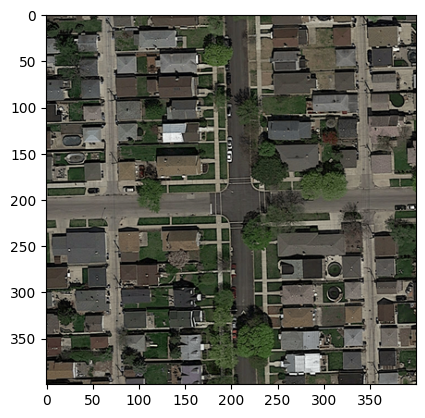

In [46]:
print(predictions)

plt.imshow(img, cmap="Greys_r")

new_img = img_overlay(img, predictions)

plt.imshow(new_img)